<h1>ZEST Data Analysis</h1>

<h2>Introduction</h2>

<p>This notebook documents the systematic analysis of data related to the ZEST project. The key operations undertaken include:</p>

<ol>
    <li><strong>Dataset Merging:</strong> Data from two separate Excel files was merged to create a unified dataset, facilitating comprehensive analysis.</li>
    <li><strong>Date Standardization:</strong> The date columns were processed and standardized to ensure uniformity and accuracy across the dataset.</li>
    <li><strong>Data Transformation:</strong> Necessary data transformations were applied to prepare the dataset for subsequent analyses and reporting.</li>
</ol>

<p>This notebook serves as a formal record of the data preparation and processing steps carried out, ensuring that the ZEST data is accurately consolidated and ready for in-depth analysis.</p>


## Merging Files

In [2]:
import pandas as pd

# Load the paths to your Excel files
file_path1 = 'Zest.xlsx'
file_path2 = 'zestplan_lang.xlsx'

# Load the data from both files
df1 = pd.read_excel(file_path1)
df2 = pd.read_excel(file_path2)

# Concatenate the two dataframes into one
merged_df = pd.concat([df1, df2])

# Save the merged dataframe into a new Excel file
output_path = 'merged_file.xlsx'
merged_df.to_excel(output_path, index=False)

print(f"Merged file saved to {output_path}")


Merged file saved to merged_file.xlsx


## Dealing with date column 

In [1]:
import pandas as pd
from datetime import datetime, timedelta

# Load the merged file
file_path = 'merged_file.xlsx'
merged_df = pd.read_excel(file_path)

# The date the data was scraped
scrape_date = datetime(2024, 7, 14)

def convert_relative_date(relative_date):
    if "day" in relative_date:
        if "A day ago" in relative_date:
            days_ago = 1
        else:
            days_ago = int(relative_date.split()[0])
        return scrape_date - timedelta(days=days_ago)
    return datetime.strptime(relative_date, "%Y-%m-%d")

# Apply the function to convert relative dates to actual dates
merged_df['Review Date'] = merged_df['Review Date'].apply(lambda x: convert_relative_date(x) if isinstance(x, str) and ('day' in x or 'A day ago' in x) else x)

# Save the cleaned dataframe to a new Excel file
output_path = 'cleaned_merged_file.xlsx'
merged_df.to_excel(output_path, index=False)

print(f"Cleaned and merged file saved to {output_path}")


C:\Users\El Hamd\AppData\Local\Temp\ipykernel_18004\68571729.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Cleaned and merged file saved to cleaned_merged_file.xlsx


In [3]:
import pandas as pd
from datetime import datetime

# Load the merged file
file_path = 'cleaned_merged_file.xlsx'
merged_df = pd.read_excel(file_path)

# Function to standardize date formats and remove time part
def standardize_date_format(date_entry):
    if isinstance(date_entry, str):
        # Handle "Updated" prefix
        if date_entry.startswith("Updated "):
            date_entry = date_entry.replace("Updated ", "")
        
        # Attempt to parse different date formats
        try:
            standardized_date = datetime.strptime(date_entry, "%b %d, %Y")
        except ValueError:
            try:
                standardized_date = datetime.strptime(date_entry, "%m/%d/%Y %I:%M:%S %p")
            except ValueError:
                standardized_date = pd.to_datetime(date_entry, errors='coerce')  # Handle any other date formats
                
        return standardized_date.date() if standardized_date else None
    elif isinstance(date_entry, datetime):
        return date_entry.date()
    return date_entry

# Apply the function to the 'Review Date' column
merged_df['Review Date'] = merged_df['Review Date'].apply(standardize_date_format)

# Save the cleaned dataframe with standardized dates to a new Excel file
output_path_standardized = 'standardized_cleaned_merged_file.xlsx'
merged_df.to_excel(output_path_standardized, index=False)

print(f"Standardized and cleaned merged file saved to {output_path_standardized}")


Standardized and cleaned merged file saved to standardized_cleaned_merged_file.xlsx


# Setups 

In [4]:
pip install dash plotly

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.5 MB 1.4 MB/s eta 0:00:06
    --------------------------------------- 0.1/7.5 MB 1.8 MB/s eta 0:00:05
   - -------------------------------------- 0.3/7.5 MB 2.3 MB/s eta 0:00:04
   -- ------------------------------------- 0.4/7.5 MB 2.3 MB/s eta 0:00:04
   --- ------------------------------------ 0.6/7.5 MB 2.7 MB/s eta 0:00:03
   ---- ----------------------------------- 0.8/7.5 MB 3.0 MB/s eta 0:00:03
   ----- ---------------------------------- 1.0/7.5 MB 3.2 MB/s eta 0:00:03
   ------ --------------------------------- 1.1/7.5 MB 3.1 MB/s eta 0:00:03
   ------- -------------------------------- 1.3/7.5 MB 3.3 MB/s eta 0:00:02
   -------- ------------------------------- 1.5/7.5 MB 3.3 MB/s eta 0:00:02
   --------- ------------------------------ 1.7/7.5 MB 3.4 MB/s eta 0:00:02
   ---------- ---


[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import dash

In [32]:
# Install NLTK (run this in Jupyter notebook)
!pip install nltk


import nltk
nltk.download('stopwords')
nltk.download('punkt')


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.0 kB ? eta -:--:--
     ------------------ ------------------- 20.5/42.0 kB 320.0 kB/s eta 0:00:01
     --------------------------- ---------- 30.7/42.0 kB 325.1 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 337.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.5 MB 960.0 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.5 MB 1.7 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.5 MB 2.4 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.5 MB 2.4 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.5 MB 2.8 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.5 MB 2.9 MB/s eta 0:00:01
   -------


[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package stopwords to C:\Users\El
[nltk_data]     Hamd\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to C:\Users\El
[nltk_data]     Hamd\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [51]:
pip install wordcloud matplotlib


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 262.6 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/301.4 kB 262.6 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/301.4 kB 196.9 kB/s eta 0:00:02
   -------------- ----------------------- 112.6/301.4 kB 469.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/301.4 kB 469.7 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/301.4 kB 379.3 kB/s eta 0:00:01
   -------------------- ----------------- 163.8/301.4 kB 427.9 kB/s eta 0:00:01
   ---------------------------- --------- 225.3/301.4 kB 509.6 kB/s eta 0:00:01
   ------------------------------ ------- 245.8/301.4 kB 538.9 kB/s 


[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
# Step 1: Install TextBlob (run this command in your terminal or Jupyter notebook)
!pip install textblob

# Step 2: Download necessary NLTK corpora
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Now you can import TextBlob and use it for sentiment analysis
from textblob import TextBlob

# Example usage
text = "TextBlob is a great library for text processing."
blob = TextBlob(text)
print(blob.sentiment)


[nltk_data] Downloading package punkt to C:\Users\El
[nltk_data]     Hamd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\El Hamd\AppData\Roaming\nltk_data...

[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 435.7 kB/s eta 0:00:02
   ----- --------------------------------- 92.2/626.3 kB 744.7 kB/s eta 0:00:01
   -------------- ------------------------- 225.3/626.3 kB 1.3 MB/s eta 0:00:01
   -------------------- ------------------- 317.4/626.3 kB 1.5 MB/s eta 0:00:01
   ------------------------------ --------- 471.0/626.3 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 2.1 MB/s eta 0:00:00


[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


Sentiment(polarity=0.8, subjectivity=0.75)


## Rating Analysis

In [30]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the standardized cleaned merged file
file_path = 'standardized_cleaned_merged_file.xlsx'
df = pd.read_excel(file_path)

# Extract the numerical rating from the "Rating" column
df['Rating Value'] = df['Rating'].str.extract(r'(\d) out of 5 stars').astype(float)

# Calculate the distribution of ratings
rating_distribution = df['Rating Value'].value_counts().sort_index()

# Calculate the overall average rating
average_rating = df['Rating Value'].mean()

# Find the highest and lowest rating counts
max_rating_count = rating_distribution.max()
min_rating_count = rating_distribution.min()

# Create the bar plot
fig = go.Figure()

fig.add_trace(go.Bar(
    x=rating_distribution.index,
    y=rating_distribution.values,
    marker=dict(
        color=rating_distribution.values,
        colorscale='Blues',
        showscale=True
    ),
    hoverinfo='name',
    name='Ratings'
))

# Add an annotation for the highest rating count
fig.add_trace(go.Scatter(
    x=[rating_distribution.idxmax()],
    y=[max_rating_count],
    mode='markers+text',
    marker=dict(color='red', size=10),
    text=[f'Highest: {max_rating_count}'],
    textposition='top center',
    showlegend=False
))

# Add an annotation for the lowest rating count
fig.add_trace(go.Scatter(
    x=[rating_distribution.idxmin()],
    y=[min_rating_count],
    mode='markers+text',
    marker=dict(color='green', size=10),
    text=[f'Lowest: {min_rating_count}'],
    textposition='bottom right',
    showlegend=False
))

# Add title and labels
fig.update_layout(
    title={
        'text': f"Rating Distribution (Average Rating: {average_rating:.2f})",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Rating",
    yaxis_title="Count",
    template="plotly_dark",
    yaxis=dict(tickformat="d"),
    width=1000,
    height=700,
    font=dict(size=14),
)

# Customize axes
fig.update_xaxes(
    tickvals=rating_distribution.index, 
    ticktext=[f"{int(r)}-star" for r in rating_distribution.index],
    title_font=dict(size=18),
    tickfont=dict(size=14),
)
fig.update_yaxes(
    showgrid=True,  # Add grid lines
    gridwidth=1,
    gridcolor='LightGray',
    title_font=dict(size=18),
    tickfont=dict(size=14),
)

# Add summary box
fig.add_annotation(
    text=f"Average Rating: {average_rating:.2f}<br>Total Reviews: {rating_distribution.sum()}",
    xref="paper", yref="paper",
    x=1.05, y=1.1,
    showarrow=False,
    font=dict(size=14),
    align="left",
    bordercolor="black",
    borderwidth=1
)

# Show the plot
fig.show()


## Review Date Analysis 

In [31]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the standardized cleaned merged file
file_path = 'standardized_cleaned_merged_file.xlsx'
df = pd.read_excel(file_path)

# Ensure the 'Review Date' is in datetime format
df['Review Date'] = pd.to_datetime(df['Review Date'])

# Group by date to count the number of reviews per day
review_frequency = df['Review Date'].value_counts().sort_index()

# Find the dates with the highest and lowest number of reviews
max_reviews_date = review_frequency.idxmax()
max_reviews_count = review_frequency.max()
min_reviews_date = review_frequency.idxmin()
min_reviews_count = review_frequency.min()

# Create the line plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=review_frequency.index,
    y=review_frequency.values,
    mode='lines+markers',
    line=dict(color='blue', width=2),
    marker=dict(color='blue', size=5),
    text=review_frequency.values,
    hovertemplate='<b>Date:</b> %{x}<br><b>Reviews:</b> %{y}',
    name='Reviews'
))

# Add an annotation for the date with the highest number of reviews
fig.add_trace(go.Scatter(
    x=[max_reviews_date],
    y=[max_reviews_count],
    mode='markers+text',
    marker=dict(color='red', size=10),
    text=[f'Highest Reviews: {max_reviews_count}'],
    textposition='top right',
    showlegend=False,
    hoverinfo='skip'
))

# Add an annotation for the date with the lowest number of reviews
fig.add_trace(go.Scatter(
    x=[min_reviews_date],
    y=[min_reviews_count],
    mode='markers+text',
    marker=dict(color='green', size=10),
    text=[f'Lowest Reviews: {min_reviews_count}'],
    textposition='bottom right',
    showlegend=False,
    hoverinfo='skip'
))

# Add title and labels
fig.update_layout(
    title={
        'text': 'Number of Reviews Over Time',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=24)
    },
    xaxis_title="Date",
    yaxis_title="Number of Reviews",
    template="plotly_white",
    width=1200,
    height=700,
    font=dict(size=16),
)

# Customize x-axis
fig.update_xaxes(
    rangeslider_visible=True,
    tickformat='%b %d, %Y',
    title_font=dict(size=20),
    tickfont=dict(size=14),
    showgrid=True,
    gridwidth=1,
    gridcolor='LightGray'
)

# Customize y-axis
fig.update_yaxes(
    title_font=dict(size=20),
    tickfont=dict(size=14),
    showgrid=True,
    gridwidth=1,
    gridcolor='LightGray'
)

# Show the plot
fig.show()


In [4]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
file_path = 'standardized_cleaned_merged_file.xlsx'
df = pd.read_excel(file_path)

# Ensure the 'Review Date' column is in datetime format
df['Review Date'] = pd.to_datetime(df['Review Date'], errors='coerce')

# Aggregate the number of reviews by month
monthly_reviews = df['Review Date'].dt.to_period('M').value_counts().sort_index().to_timestamp()

# Aggregate the number of reviews by day of the week
df['Day of Week'] = df['Review Date'].dt.day_name()
daily_reviews = df['Day of Week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot the number of reviews by month
fig_monthly = px.line(monthly_reviews, x=monthly_reviews.index, y=monthly_reviews.values, 
                      labels={'x': 'Month', 'y': 'Number of Reviews'}, 
                      title='Number of Reviews by Month',
                      template='plotly_dark')

# Add markers for the max and min values
max_monthly_reviews = monthly_reviews.max()
min_monthly_reviews = monthly_reviews.min()
max_monthly_date = monthly_reviews.idxmax()
min_monthly_date = monthly_reviews.idxmin()

fig_monthly.add_trace(go.Scatter(
    x=[max_monthly_date],
    y=[max_monthly_reviews],
    mode='markers+text',
    marker=dict(color='red', size=10),
    text=[f'Max: {max_monthly_reviews}'],
    textposition='top right',
    showlegend=False
))

fig_monthly.add_trace(go.Scatter(
    x=[min_monthly_date],
    y=[min_monthly_reviews],
    mode='markers+text',
    marker=dict(color='green', size=10),
    text=[f'Min: {min_monthly_reviews}'],
    textposition='bottom right',
    showlegend=False
))

# Customize the layout
fig_monthly.update_layout(
    title={
        'text': 'Number of Reviews by Month',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24}
    },
    xaxis_title='Month',
    yaxis_title='Number of Reviews',
    font=dict(size=16),
    width=1000,
    height=600
)

# Add grid lines
fig_monthly.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig_monthly.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')

# Show the plot
fig_monthly.show()

# Plot the number of reviews by day of the week
fig_daily = px.bar(daily_reviews, x=daily_reviews.index, y=daily_reviews.values, 
                   labels={'x': 'Day of the Week', 'y': 'Number of Reviews'}, 
                   title='Number of Reviews by Day of the Week',
                   template='plotly_dark',
                   color=daily_reviews.values,
                   color_continuous_scale='Viridis')

# Add markers for the max and min values
max_daily_reviews = daily_reviews.max()
min_daily_reviews = daily_reviews.min()
max_daily_day = daily_reviews.idxmax()
min_daily_day = daily_reviews.idxmin()

fig_daily.add_trace(go.Scatter(
    x=[max_daily_day],
    y=[max_daily_reviews],
    mode='markers+text',
    marker=dict(color='red', size=10),
    text=[f'Max: {max_daily_reviews}'],
    textposition='top right',
    showlegend=False
))

fig_daily.add_trace(go.Scatter(
    x=[min_daily_day],
    y=[min_daily_reviews],
    mode='markers+text',
    marker=dict(color='green', size=10),
    text=[f'Min: {min_daily_reviews}'],
    textposition='bottom right',
    showlegend=False
))

# Customize the layout
fig_daily.update_layout(
    title={
        'text': 'Number of Reviews by Day of the Week',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24}
    },
    xaxis_title='Day of the Week',
    yaxis_title='Number of Reviews',
    font=dict(size=16),
    width=1000,
    height=600
)

# Add grid lines
fig_daily.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig_daily.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')

# Show the plot
fig_daily.show()


# Text Length Analysis

### Text Preprocessing

In [33]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Load the standardized cleaned merged file
file_path = 'standardized_cleaned_merged_file.xlsx'
df = pd.read_excel(file_path)

# Ensure the 'Review' column is in string format
df['Review'] = df['Review'].astype(str)

# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Define a function for text preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

# Apply the preprocessing function to the 'Review' column
df['Processed Review'] = df['Review'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to C:\Users\El
[nltk_data]     Hamd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\El
[nltk_data]     Hamd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [34]:
df.head()

,Reviewee Name,Rating,Question,Review,Review Date,Processed Review
0,Netty,Rated 5 out of 5 stars,GREAT JOB!,On receiving details on who would be tending t...,2024-07-11,receiving details would tending repair regular...
1,Ethan Gayle,Rated 5 out of 5 stars,Patrick was friendly,"Patrick was friendly, assertive & completed th...",2024-07-13,patrick friendly assertive completed job effic...
2,Karen,Rated 5 out of 5 stars,Great service the engineer Stephen…,Great service the engineer Stephen arrived whe...,2024-07-12,great service engineer stephen arrived said wo...
3,Kathleen Thompson,Rated 5 out of 5 stars,We go around once a month to Zest and…,We go around once a month to Zest and have bee...,2024-07-12,go around month zest going years always positi...
4,Farah Khan,Rated 5 out of 5 stars,The engineer who came called Yanis was…,The engineer who came called Yanis was absolut...,2024-07-09,engineer came called yanis absolutely fantasti...


### Keyword Extraction using TF-IDF

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=20)  # Adjust max_features to limit the number of keywords

# Fit and transform the processed reviews
tfidf_matrix = vectorizer.fit_transform(df['Processed Review'])

# Get the feature names (keywords)
keywords = vectorizer.get_feature_names_out()

# Sum the TF-IDF values for each keyword
tfidf_sums = tfidf_matrix.sum(axis=0).A1

# Create a DataFrame for the keywords and their TF-IDF sums
keyword_df = pd.DataFrame({'Keyword': keywords, 'TF-IDF': tfidf_sums})

# Sort the DataFrame by TF-IDF values
keyword_df = keyword_df.sort_values(by='TF-IDF', ascending=False)

# Display the top keywords
print(keyword_df)


      Keyword      TF-IDF
8     helpful  511.245309
14    service  473.076752
19       zest  454.247796
3    engineer  344.430631
5    friendly  273.529413
10     polite  267.998406
6        good  255.017276
4   excellent  250.273827
7       great  235.874963
18      would  232.812553
16       time  230.960984
15      thank  229.934349
13     repair  219.258256
9     machine  217.891372
1     company  213.363315
2    customer  205.854247
0        call  201.892131
12  recommend  196.188736
11    problem  192.191917
17    washing  182.665844


### Associate Keywords with Ratings

In [46]:
# Extract the numerical rating from the "Rating" column
df['Rating Value'] = df['Rating'].str.extract(r'(\d)').astype(float)

In [47]:
# Define a function to get keywords from a review
def get_keywords(review, keywords):
    review_keywords = []
    for keyword in keywords:
        if keyword in review:
            review_keywords.append(keyword)
    return review_keywords

# Apply the function to get keywords from each review
df['Keywords'] = df['Processed Review'].apply(lambda x: get_keywords(x, keywords))

# Explode the DataFrame to have one keyword per row
exploded_df = df.explode('Keywords')

# Ensure 'Rating Value' column exists
if 'Rating Value' in exploded_df.columns:
    # Group by keyword and calculate the average rating for each keyword
    keyword_ratings = exploded_df.groupby('Keywords')['Rating Value'].mean().reset_index()

    # Sort by average rating
    keyword_ratings = keyword_ratings.sort_values(by='Rating Value', ascending=False)

    # Display the keyword ratings
    print(keyword_ratings)
else:
    print("Column 'Rating Value' not found in the DataFrame.")


     Keywords  Rating Value
4   excellent      4.967480
5    friendly      4.950758
15      thank      4.945055
10     polite      4.940741
7       great      4.914027
8     helpful      4.895551
12  recommend      4.842912
6        good      4.750000
14    service      4.709030
11    problem      4.699531
17    washing      4.653061
19       zest      4.649269
9     machine      4.641026
2    customer      4.638095
18      would      4.603636
13     repair      4.573718
0        call      4.503226
3    engineer      4.489796
16       time      4.476364
1     company      4.323944


### Visualization

In [50]:
import plotly.express as px

# Plot the top keywords by TF-IDF value
fig = px.bar(keyword_df.head(20), 
             x='TF-IDF', 
             y='Keyword', 
             orientation='h', 
             title='Top Keywords by TF-IDF Value',
             color='TF-IDF',
             color_continuous_scale='Blues',
             labels={'TF-IDF': 'TF-IDF Score', 'Keyword': 'Keywords'})

# Customize the layout
fig.update_layout(
    title={
        'text': 'Top Keywords by TF-IDF Value',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="TF-IDF Score",
    yaxis_title="Keywords",
    template="plotly_white",
    width=1000,
    height=600,
    font=dict(size=14)
)

# Add grid lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')

# Show the plot
fig.show()

# Plot the average rating for each keyword
fig = px.bar(keyword_ratings, 
             x='Rating Value', 
             y='Keywords', 
             orientation='h', 
             title='Average Rating for Each Keyword',
             color='Rating Value',
             color_continuous_scale='Viridis',
             labels={'Rating Value': 'Average Rating', 'Keywords': 'Keywords'})

# Customize the layout
fig.update_layout(
    title={
        'text': 'Average Rating for Each Keyword',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Average Rating",
    yaxis_title="Keywords",
    template="plotly_white",
    width=1000,
    height=600,
    font=dict(size=14)
)

# Add grid lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')

# Show the plot
fig.show()


# Word Cloud 

In [53]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the standardized cleaned merged file
file_path = 'standardized_cleaned_merged_file.xlsx'
df = pd.read_excel(file_path)

# Ensure the 'Review' column is in string format
df['Review'] = df['Review'].astype(str)

# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Define a function for text preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

# Apply the preprocessing function to the 'Review' column
df['Processed Review'] = df['Review'].apply(preprocess_text)

# Define a function to get the sentiment of a review
def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify the polarity: positive, negative, neutral
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the sentiment function to the reviews
df['Sentiment'] = df['Review'].apply(get_sentiment)

# Display the sentiment distribution
sentiment_distribution = df['Sentiment'].value_counts()
print(sentiment_distribution)


[nltk_data] Downloading package stopwords to C:\Users\El
[nltk_data]     Hamd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\El
[nltk_data]     Hamd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Sentiment
Positive    3059
Neutral      339
Negative     183
Name: count, dtype: int64


[nltk_data] Downloading package stopwords to C:\Users\El
[nltk_data]     Hamd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\El
[nltk_data]     Hamd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


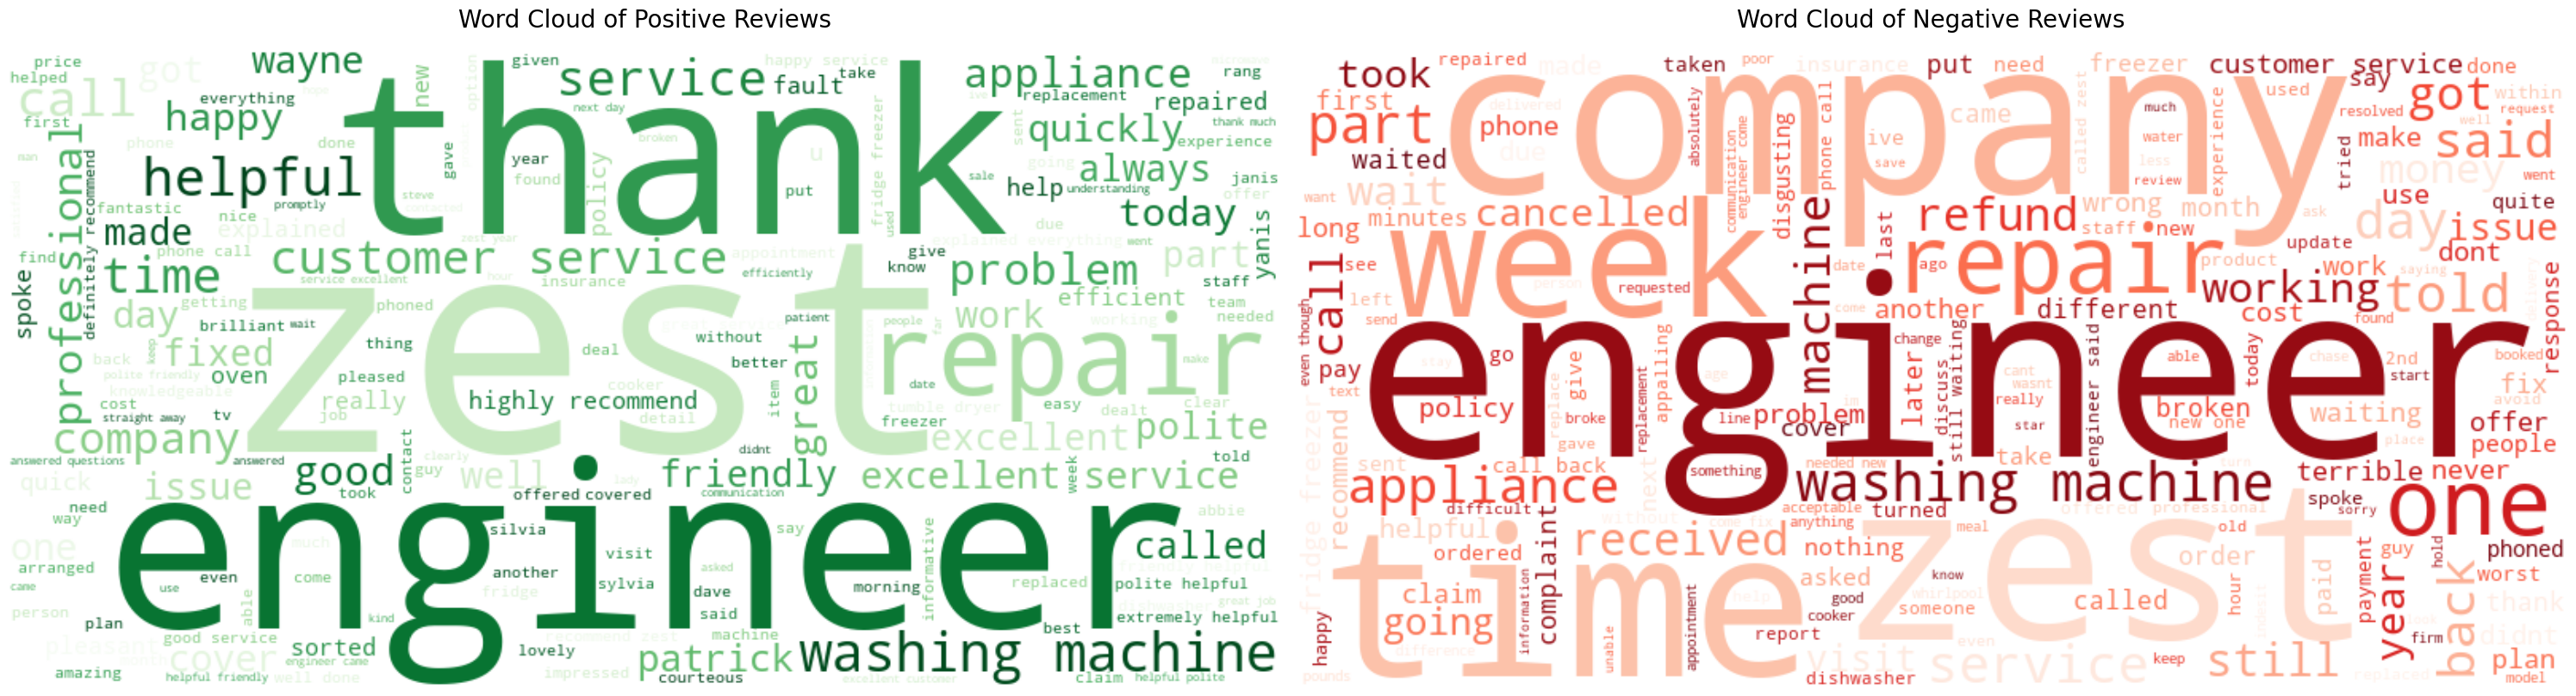

In [58]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the standardized cleaned merged file
file_path = 'standardized_cleaned_merged_file.xlsx'
df = pd.read_excel(file_path)

# Ensure the 'Review' column is in string format
df['Review'] = df['Review'].astype(str)

# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Define a function for text preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

# Apply the preprocessing function to the 'Review' column
df['Processed Review'] = df['Review'].apply(preprocess_text)

# Define a function to get the sentiment of a review
def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify the polarity: positive, negative, neutral
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the sentiment function to the reviews
df['Sentiment'] = df['Review'].apply(get_sentiment)

# Generate word clouds for positive and negative reviews
positive_reviews = " ".join(df[df['Sentiment'] == 'Positive']['Processed Review'])
negative_reviews = " ".join(df[df['Sentiment'] == 'Negative']['Processed Review'])

# Create word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_reviews)

# Display the word clouds side by side
fig, axes = plt.subplots(1, 2, figsize=(30, 15), sharex=True, sharey=True)

# Positive word cloud
axes[0].imshow(positive_wordcloud, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Word Cloud of Positive Reviews', fontsize=20, pad=20)

# Negative word cloud
axes[1].imshow(negative_wordcloud, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Word Cloud of Negative Reviews', fontsize=20, pad=20)

# Display the plot
plt.tight_layout()
plt.show()


### Impact of Specific Keywords on Ratings

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px

# Load the dataset
file_path = 'standardized_cleaned_merged_file.xlsx'
df = pd.read_excel(file_path)

# Ensure the 'Review' column is in string format
df['Review'] = df['Review'].astype(str)

# Create the 'Rating Value' column by extracting the numerical rating
df['Rating Value'] = df['Rating'].str.extract(r'(\d)').astype(float)

# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Define a function for text preprocessing
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

# Apply the preprocessing function to the 'Review' column
df['Processed Review'] = df['Review'].apply(preprocess_text)

# Define a count vectorizer
vectorizer = CountVectorizer(max_features=1000, stop_words='english')

# Fit and transform the processed reviews
X = vectorizer.fit_transform(df['Processed Review'])
keywords = vectorizer.get_feature_names_out()

# Create a DataFrame with the keyword counts
keyword_counts = pd.DataFrame(X.toarray(), columns=keywords)
keyword_counts['Rating Value'] = df['Rating Value']

# Calculate the average rating for each keyword
avg_keyword_ratings = pd.DataFrame(index=keywords)

for keyword in keywords:
    avg_keyword_ratings.loc[keyword, 'Average Rating'] = keyword_counts.loc[keyword_counts[keyword] > 0, 'Rating Value'].mean()

# Sort the average ratings
avg_keyword_ratings = avg_keyword_ratings.sort_values('Average Rating', ascending=False)

# Identify top 20 keywords with the highest average ratings
top_keywords_high_ratings = avg_keyword_ratings.head(20)

# Identify top 20 keywords with the lowest average ratings
top_keywords_low_ratings = avg_keyword_ratings.tail(20)

# Define a color palette
color_palette_high = px.colors.sequential.Tealgrn
color_palette_low = px.colors.sequential.Magenta

# Visualize the keywords with the highest average ratings
fig_high_ratings = px.bar(top_keywords_high_ratings, 
                          title='Top Keywords by Average High Ratings',
                          labels={'index': 'Keyword', 'Average Rating': 'Average Rating'},
                          color=top_keywords_high_ratings.index,
                          color_discrete_sequence=color_palette_high)

fig_high_ratings.update_layout(
    title={
        'text': 'Top Keywords by Average High Ratings',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24}
    },
    xaxis_title='Keyword',
    yaxis_title='Average Rating',
    template='plotly_white',
    font=dict(size=16),
    width=1200,
    height=700
)

# Add annotations
fig_high_ratings.update_traces(texttemplate='%{y:.2f}', textposition='outside')

fig_high_ratings.show()

# Visualize the keywords with the lowest average ratings
fig_low_ratings = px.bar(top_keywords_low_ratings, 
                         title='Top Keywords by Average Low Ratings',
                         labels={'index': 'Keyword', 'Average Rating': 'Average Rating'},
                         color=top_keywords_low_ratings.index,
                         color_discrete_sequence=color_palette_low)

fig_low_ratings.update_layout(
    title={
        'text': 'Top Keywords by Average Low Ratings',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24}
    },
    xaxis_title='Keyword',
    yaxis_title='Average Rating',
    template='plotly_white',
    font=dict(size=16),
    width=1200,
    height=700
)

# Add annotations
fig_low_ratings.update_traces(texttemplate='%{y:.2f}', textposition='outside')

fig_low_ratings.show()


C:\Users\El Hamd\AppData\Local\Temp\ipykernel_19796\109249540.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
[nltk_data] Downloading package stopwords to C:\Users\El
[nltk_data]     Hamd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\El
[nltk_data]     Hamd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
